<a href="https://colab.research.google.com/github/horyekhunley/mnist_knn/blob/main/mnist_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


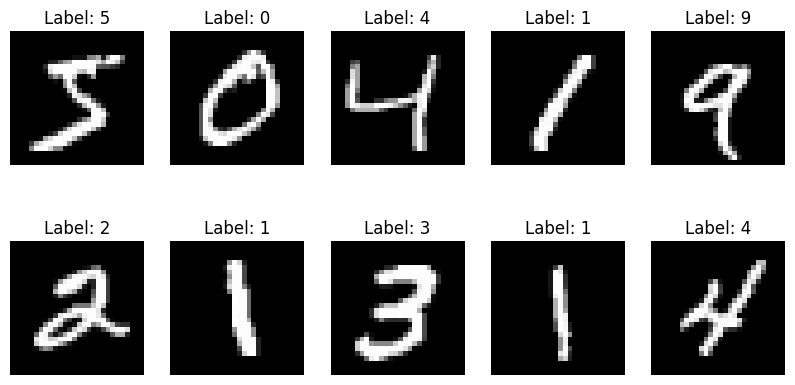

In [ ]:
# display first 10 images in the training dataset

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(f"Label: {y_train[i]}")
  ax.axis('off')

plt.show()

Data Preprocessing

In [ ]:
# 1. reshape image data

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# 2. normalize pixel values

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# 3. verify preprocessing

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


Perform EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# distribution of target classes in the training set

unique_train, counts_train = np.unique(y_train, return_counts=True)
train_digit_distribution = dict(zip(unique_train, counts_train))

print("Training set digit distribution: ", train_digit_distribution)

Training set digit distribution:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


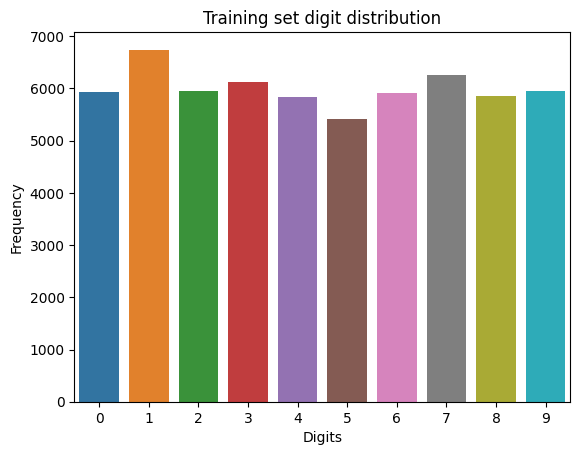

In [ ]:
# bar plot for training set

sns.barplot(x=list(train_digit_distribution.keys()), y=list(train_digit_distribution.values()))
plt.title("Training set digit distribution")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of target classes in the training set

unique_test, counts_test = np.unique(y_test, return_counts=True)
test_digit_distribution = dict(zip(unique_test, counts_test))

print("Testing set digit distribution: ", test_digit_distribution)

Testing set digit distribution:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


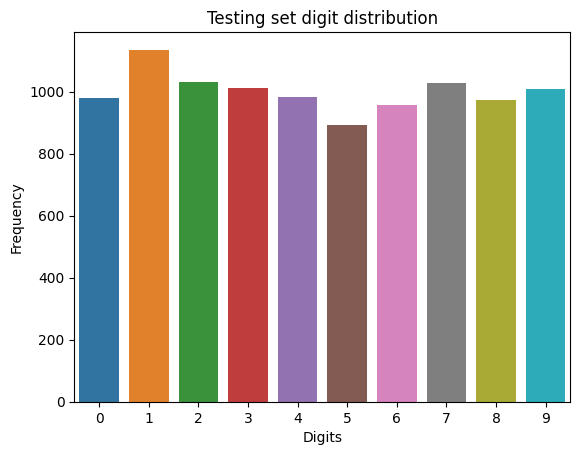

In [ ]:
# bar plot for testing set

sns.barplot(x=list(test_digit_distribution.keys()), y=list(test_digit_distribution.values()))
plt.title("Testing set digit distribution")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

Apply K-Nearest-Neigbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# initialize knn

knn = KNeighborsClassifier()

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
# Define the parameter grid for GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# perform GridSearchCV with KNN
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Fit the model to the training data and perform the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best combination of hyperparameter values
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best combination of hyperparameter values
print("Best parameters:", best_params)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# create a KNN classifier with the best parameters

knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])

# train model on best best training data

knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
# Make predictions on the test set
y_pred = knn_best.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best parameters:", accuracy)

Accuracy with best parameters: 0.9717


In [ ]:
# Evaluate the model using classification report and confusion matrix
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   9    7  997    2    0    0    1   14    2    0]
 [   0    1    4  975    1   13    1    